In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import pyarrow.parquet as pq

In [ ]:
pq_file = '/content/drive/MyDrive/Colab Notebooks/Aug2024.parquet'
rows = 10000
table = pq.read_table(pq_file , columns = None , use_threads = True)
data = table.to_pandas()
data = data.head(rows)
data.shape

(10000, 110)

In [ ]:
data.to_csv('data.csv')

In [ ]:
new_data1 = pd.read_csv('/content/drive/MyDrive/data.csv')
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Column1                       10000 non-null  int64  
 1   timestamp                     10000 non-null  object 
 2   Store No_                     10000 non-null  object 
 3   POS Terminal No_              10000 non-null  object 
 4   Transaction No_               10000 non-null  int64  
 5   Line No_                      10000 non-null  int64  
 6   Receipt No_                   10000 non-null  object 
 7   Barcode No_                   9642 non-null   float64
 8   Item No_                      10000 non-null  int64  
 9   Item Category Code            10000 non-null  int64  
 10  Product Group Code            10000 non-null  int64  
 11  Price                         10000 non-null  float64
 12  Net Price                     10000 non-null  float64
 13  Qu

In [ ]:
new_data1 = new_data1[['Store No_' , 'Transaction No_' , 'Receipt No_' , 'Item Category Code' , 'Product Group Code' , 'Price' ,
                       'Net Price' , 'Quantity' , 'Discount Amount' , 'Cost Amount', 'Date','Net Amount', 'VAT Amount' , 'Member Points']]
new_data1.head()

,Store No_,Transaction No_,Receipt No_,Item Category Code,Product Group Code,Price,Net Price,Quantity,Discount Amount,Cost Amount,Date,Net Amount,VAT Amount,Member Points
0,ALX,702256,00000P2812000619508,102,2042,6.70,5.87719,-1.0,0.0,-4.99198,6/1/2024,-5.88,-0.82,0.00
1,ALX,702257,00000P2812000619509,102,2037,14.95,14.95000,-1.0,0.0,-12.71854,6/1/2024,-14.95,0.00,0.00
2,ALX,702260,00000P2812000619511,212,12180,10.00,8.77193,-1.0,0.0,-7.02000,6/1/2024,-8.77,-1.23,0.00
3,ALX,702261,00000P2812000619512,104,4077,134.95,118.37719,-1.0,0.0,-93.88908,6/1/2024,-118.38,-16.57,0.00
4,ALX,702262,00000P2812000619513,101,1001,48.25,48.25000,-1.0,0.0,-41.82347,6/1/2024,-48.25,0.00,6.89


In [ ]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Store No_           10000 non-null  object 
 1   Transaction No_     10000 non-null  int64  
 2   Receipt No_         10000 non-null  object 
 3   Item Category Code  10000 non-null  int64  
 4   Product Group Code  10000 non-null  int64  
 5   Price               10000 non-null  float64
 6   Net Price           10000 non-null  float64
 7   Quantity            10000 non-null  float64
 8   Discount Amount     10000 non-null  float64
 9   Cost Amount         10000 non-null  float64
 10  Date                10000 non-null  object 
 11  Net Amount          10000 non-null  float64
 12  VAT Amount          10000 non-null  float64
 13  Member Points       10000 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


In [ ]:
for x in new_data1.columns:
  if "No_" in x or "Code" in x :
    new_data1[x] = new_data1[x].astype(object)
new_data1['Date'] = pd.to_datetime(new_data1['Date'])
new_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Store No_           10000 non-null  object        
 1   Transaction No_     10000 non-null  object        
 2   Receipt No_         10000 non-null  object        
 3   Item Category Code  10000 non-null  object        
 4   Product Group Code  10000 non-null  object        
 5   Price               10000 non-null  float64       
 6   Net Price           10000 non-null  float64       
 7   Quantity            10000 non-null  float64       
 8   Discount Amount     10000 non-null  float64       
 9   Cost Amount         10000 non-null  float64       
 10  Date                10000 non-null  datetime64[ns]
 11  Net Amount          10000 non-null  float64       
 12  VAT Amount          10000 non-null  float64       
 13  Member Points       10000 non-null  float64    

In [ ]:
new_data1['Store No_'].unique()

array(['ALX'], dtype=object)

In [ ]:
new_data1.drop(columns = 'Store No_' , inplace = True)

In [ ]:
new_data1.sample(5)

,Transaction No_,Receipt No_,Item Category Code,Product Group Code,Price,Net Price,Quantity,Discount Amount,Cost Amount,Date,Net Amount,VAT Amount,Member Points
1194,702549,00000P2812000619760,102,2042,6.00,5.26316,-1.0,0.0,-4.87425,2024-06-01,-5.27,-0.73,0.0
7888,704248,00000P2812000621207,102,2039,5.00,5.00000,-1.0,0.0,-4.58260,2024-06-06,-5.00,0.00,0.0
7694,704213,00000P2812000621173,102,2041,16.25,14.25439,-2.0,0.0,-26.02604,2024-06-06,-28.51,-3.99,0.0
435,702404,00000P2812000619636,101,1003,154.90,154.90000,-1.0,0.0,-111.97733,2024-06-01,-154.90,0.00,0.0
4577,703379,00000P2812000620465,102,2039,15.75,15.75000,-2.0,0.0,-30.92792,2024-06-04,-31.50,0.00,0.0


In [ ]:
new_data1.drop_duplicates(inplace = True)
new_data1.shape

(9893, 13)

In [ ]:
cols = ['Quantity' , 'Cost Amount' , 'Net Amount' , 'VAT Amount']
for x in new_data1[cols]:
  new_data1[x] = new_data1[x].abs()
new_data1.sample()


,Transaction No_,Receipt No_,Item Category Code,Product Group Code,Price,Net Price,Quantity,Discount Amount,Cost Amount,Date,Net Amount,VAT Amount,Member Points
8507,704400,00000P2812000621335,212,12180,15.0,13.15789,2.0,0.0,17.54,2024-06-07,26.32,3.68,0.0


In [ ]:
new_data1[['Quantity' , 'Cost Amount' , 'Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,9893.0,1.380321,2.008262,0.01200,1.00000,1.00000,1.00000,96.00000
Cost Amount,9893.0,53.605462,182.819622,0.00002,12.51821,26.56602,56.45662,8967.58103
Price,9893.0,73.606320,225.424913,0.65000,12.00000,29.95000,69.95000,10649.00000


In [ ]:
px.box(data_frame = new_data1 , x = 'Price')

In [ ]:
px.box(data_frame = new_data1 , x = 'Quantity')

In [ ]:
px.box(data_frame = new_data1 , x = 'Cost Amount')

In [ ]:
new_data = new_data1[new_data1['Price'] < 2000]
new_data = new_data[new_data['Quantity'] < 30]
new_data = new_data[new_data['Cost Amount'] < 2200]
new_data.shape

(9882, 13)

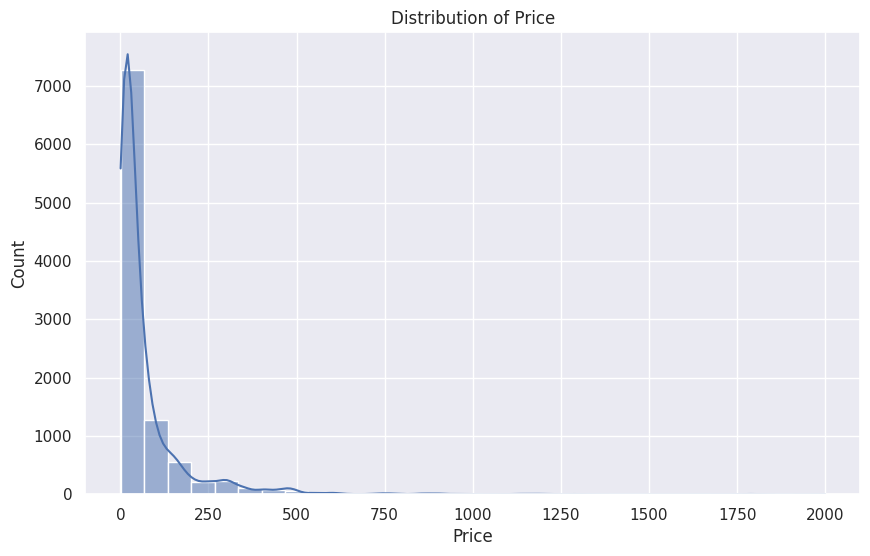

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

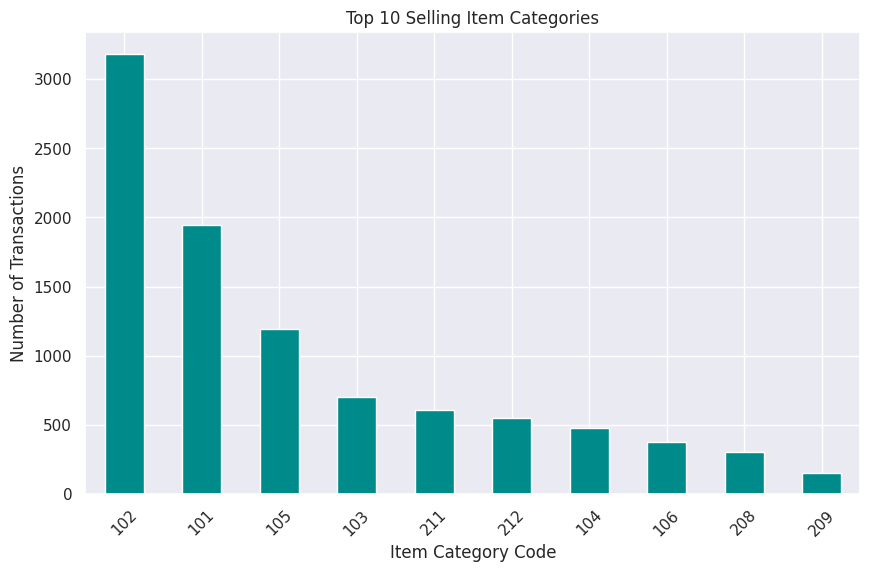

In [ ]:
top_categories = new_data['Item Category Code'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar' , color = 'darkcyan')
plt.title('Top 10 Selling Item Categories')
plt.xlabel('Item Category Code')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

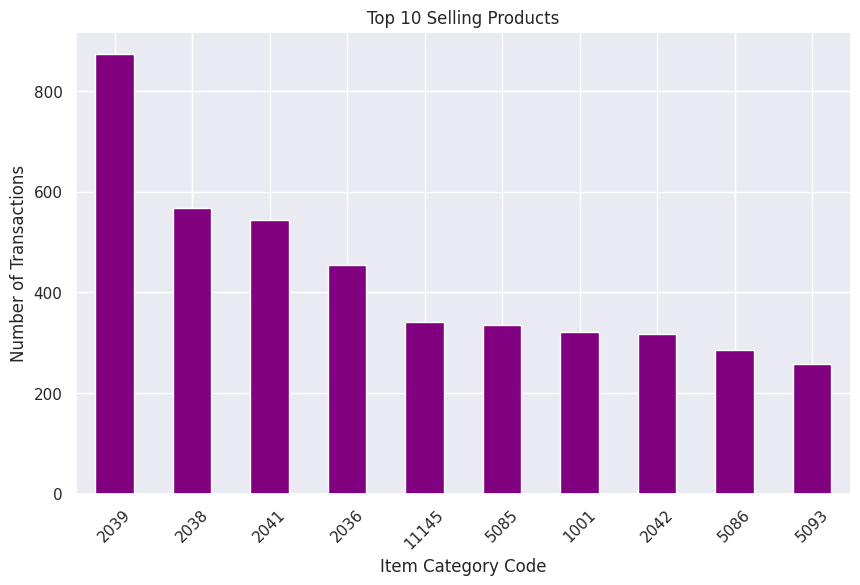

In [ ]:
top_categories = new_data['Product Group Code'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar' , color = 'purple')
plt.title('Top 10 Selling Products')
plt.xlabel('Item Category Code')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

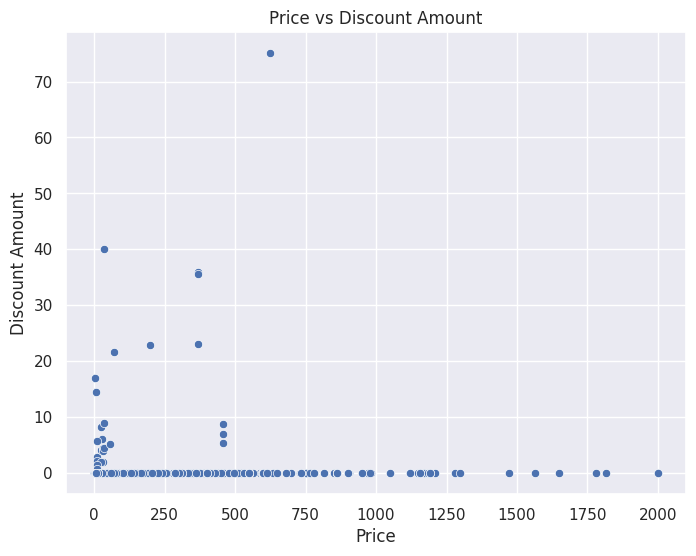

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Discount Amount', data=new_data)
plt.title('Price vs Discount Amount')
plt.xlabel('Price')
plt.ylabel('Discount Amount')
plt.show()

In [ ]:
dd = new_data.groupby('Item Category Code' , as_index = False)['Cost Amount'].sum().sort_values(by = 'Cost Amount' , ascending = False)
dd.head()

,Item Category Code,Cost Amount
0,101,105454.68188
4,105,65528.00003
1,102,64938.69754
2,103,55631.82415
8,209,35074.74136


<Figure size 1000x600 with 0 Axes>

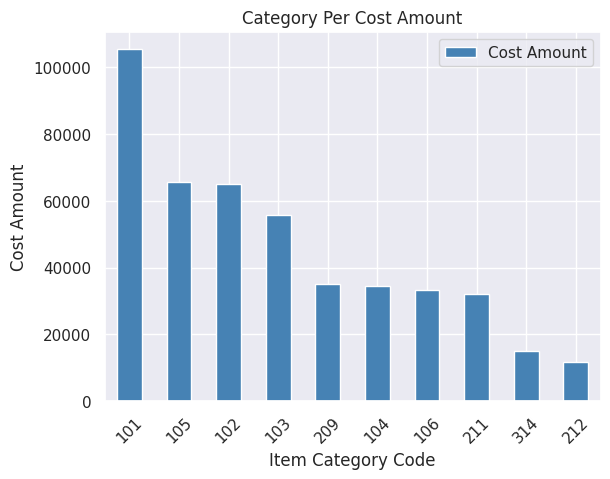

In [ ]:
plt.figure(figsize=(10, 6))
dd.head(10).plot(kind = 'bar' , x = 'Item Category Code' , y = 'Cost Amount' , color = 'steelblue')
plt.title('Category Per Cost Amount')
plt.xlabel('Item Category Code')
plt.ylabel('Cost Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1000 with 0 Axes>

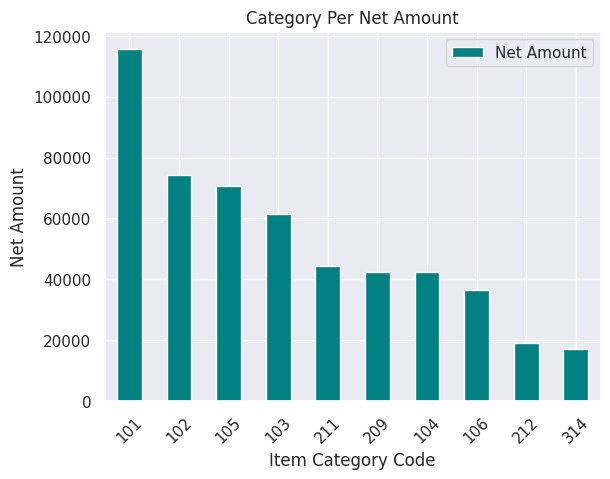

In [ ]:
dd = new_data.groupby('Item Category Code' , as_index = False)['Net Amount'].sum().sort_values(by = 'Net Amount' , ascending = False)
plt.figure(figsize=(20, 10))
dd.head(10).plot(kind = 'bar' , x = 'Item Category Code' , y = 'Net Amount' , color = 'teal')
plt.title('Category Per Net Amount')
plt.xlabel('Item Category Code')
plt.ylabel('Net Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1000 with 0 Axes>

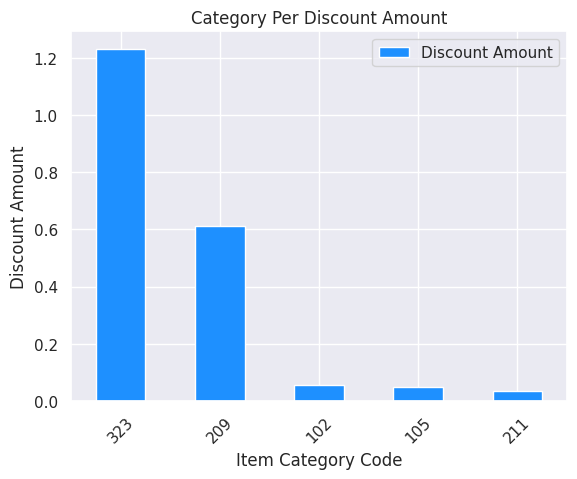

In [ ]:
dd = new_data.groupby('Item Category Code' , as_index = False)['Discount Amount'].mean().sort_values(by = 'Discount Amount' , ascending = False)
plt.figure(figsize=(20, 10))
dd.head(5).plot(kind = 'bar' , x = 'Item Category Code' , y = 'Discount Amount' , color = 'dodgerblue')
plt.title('Category Per Discount Amount')
plt.xlabel('Item Category Code')
plt.ylabel('Discount Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1000 with 0 Axes>

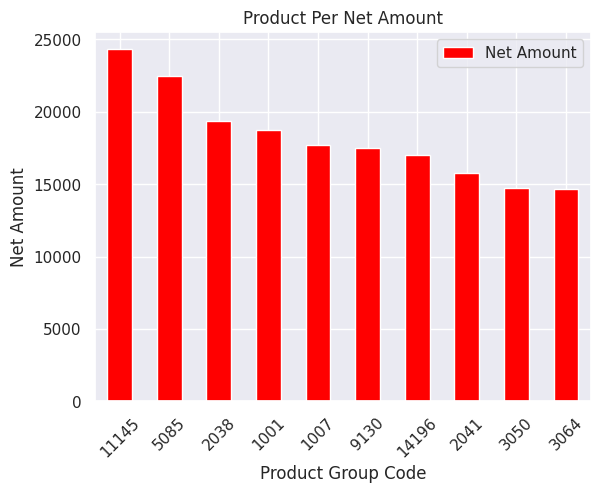

In [ ]:
dd = new_data.groupby('Product Group Code' , as_index = False)['Net Amount'].sum().sort_values(by = 'Net Amount' , ascending = False)
plt.figure(figsize=(20, 10))
dd.head(10).plot(kind = 'bar' , x = 'Product Group Code' , y = 'Net Amount' , color = 'red')
plt.title('Product Per Net Amount')
plt.xlabel('Product Group Code')
plt.ylabel('Net Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1000 with 0 Axes>

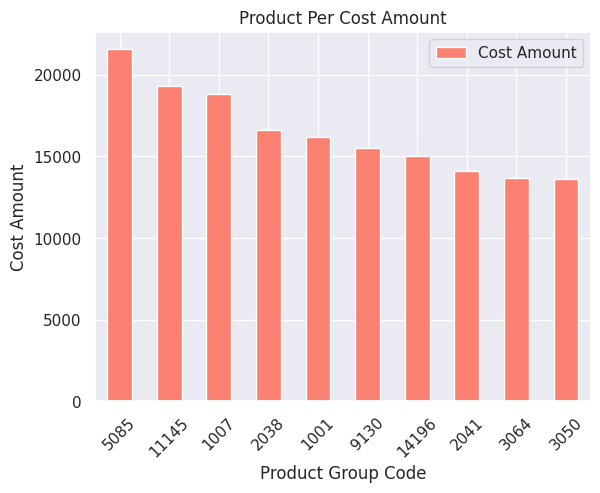

In [ ]:
dd = new_data.groupby('Product Group Code' , as_index = False)['Cost Amount'].sum().sort_values(by = 'Cost Amount' , ascending = False)
plt.figure(figsize=(20, 10))
dd.head(10).plot(kind = 'bar' , x = 'Product Group Code' , y = 'Cost Amount' , color = 'salmon')
plt.title('Product Per Cost Amount')
plt.xlabel('Product Group Code')
plt.ylabel('Cost Amount')
plt.xticks(rotation=45)
plt.show()

<Figure size 2000x1000 with 0 Axes>

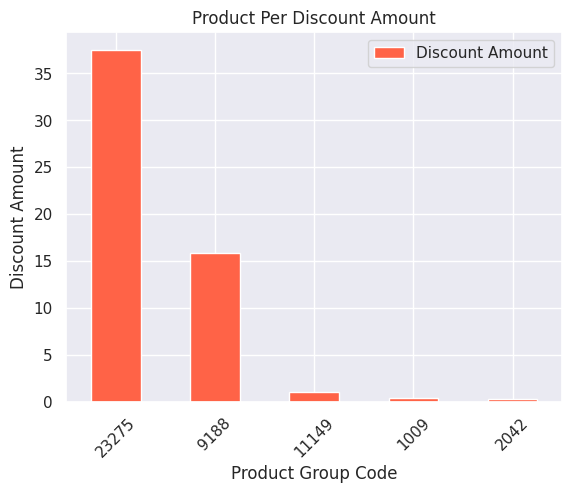

In [ ]:
dd = new_data.groupby('Product Group Code' , as_index = False)['Discount Amount'].mean().sort_values(by = 'Discount Amount' , ascending = False)
plt.figure(figsize=(20, 10))
dd.head(5).plot(kind = 'bar' , x = 'Product Group Code' , y = 'Discount Amount' , color = 'tomato')
plt.title('Product Per Discount Amount')
plt.xlabel('Product Group Code')
plt.ylabel('Discount Amount')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

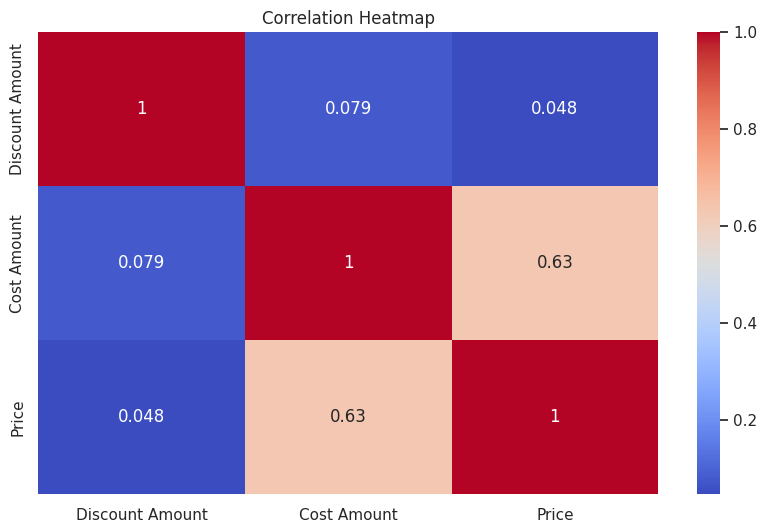

In [ ]:
corr = new_data[['Discount Amount' , 'Cost Amount' , 'Price']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')